<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3),

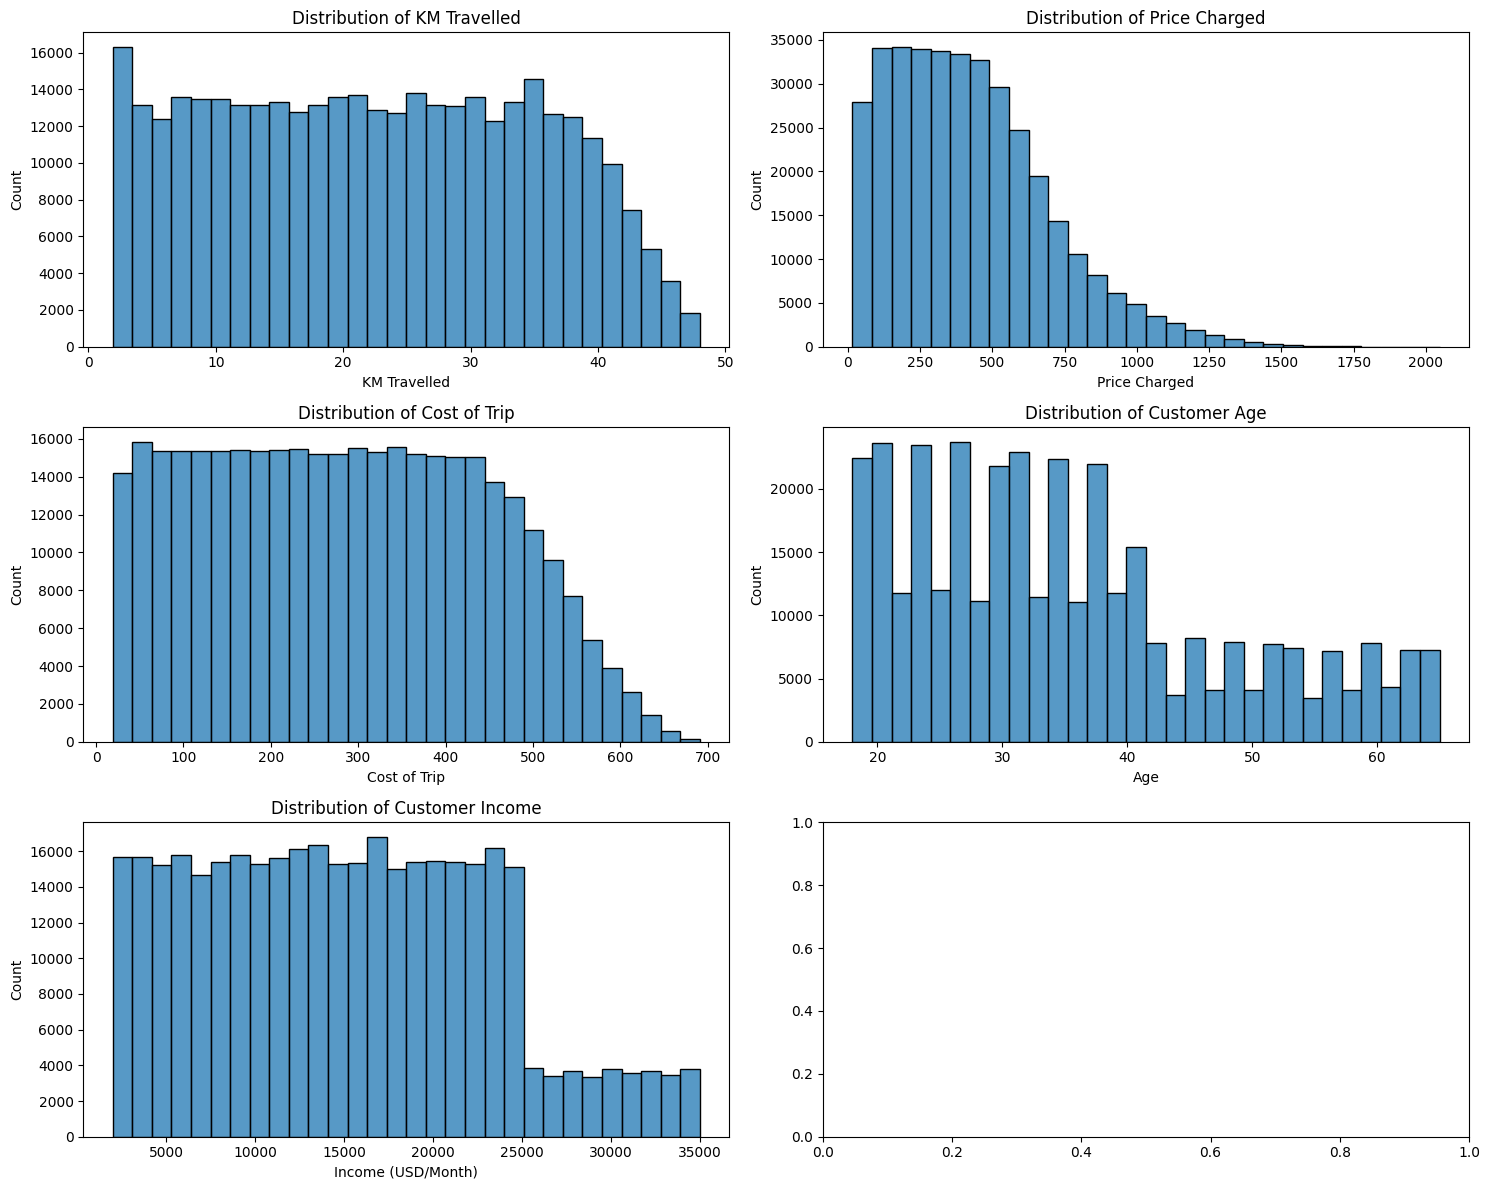

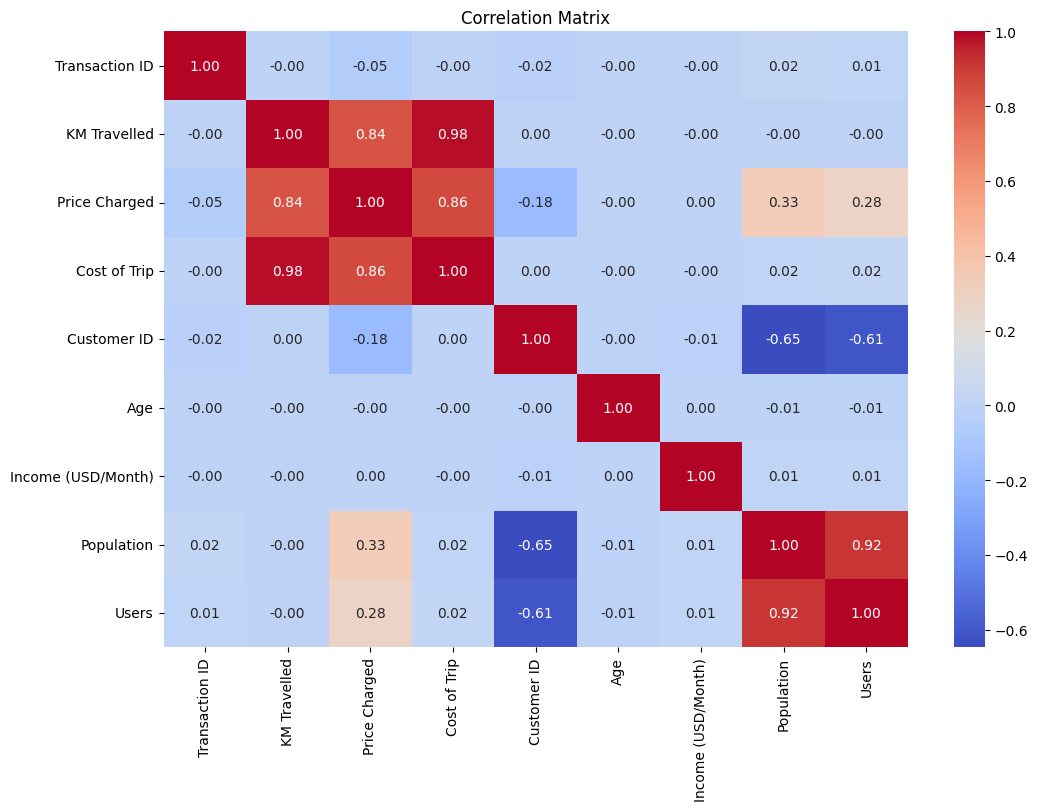

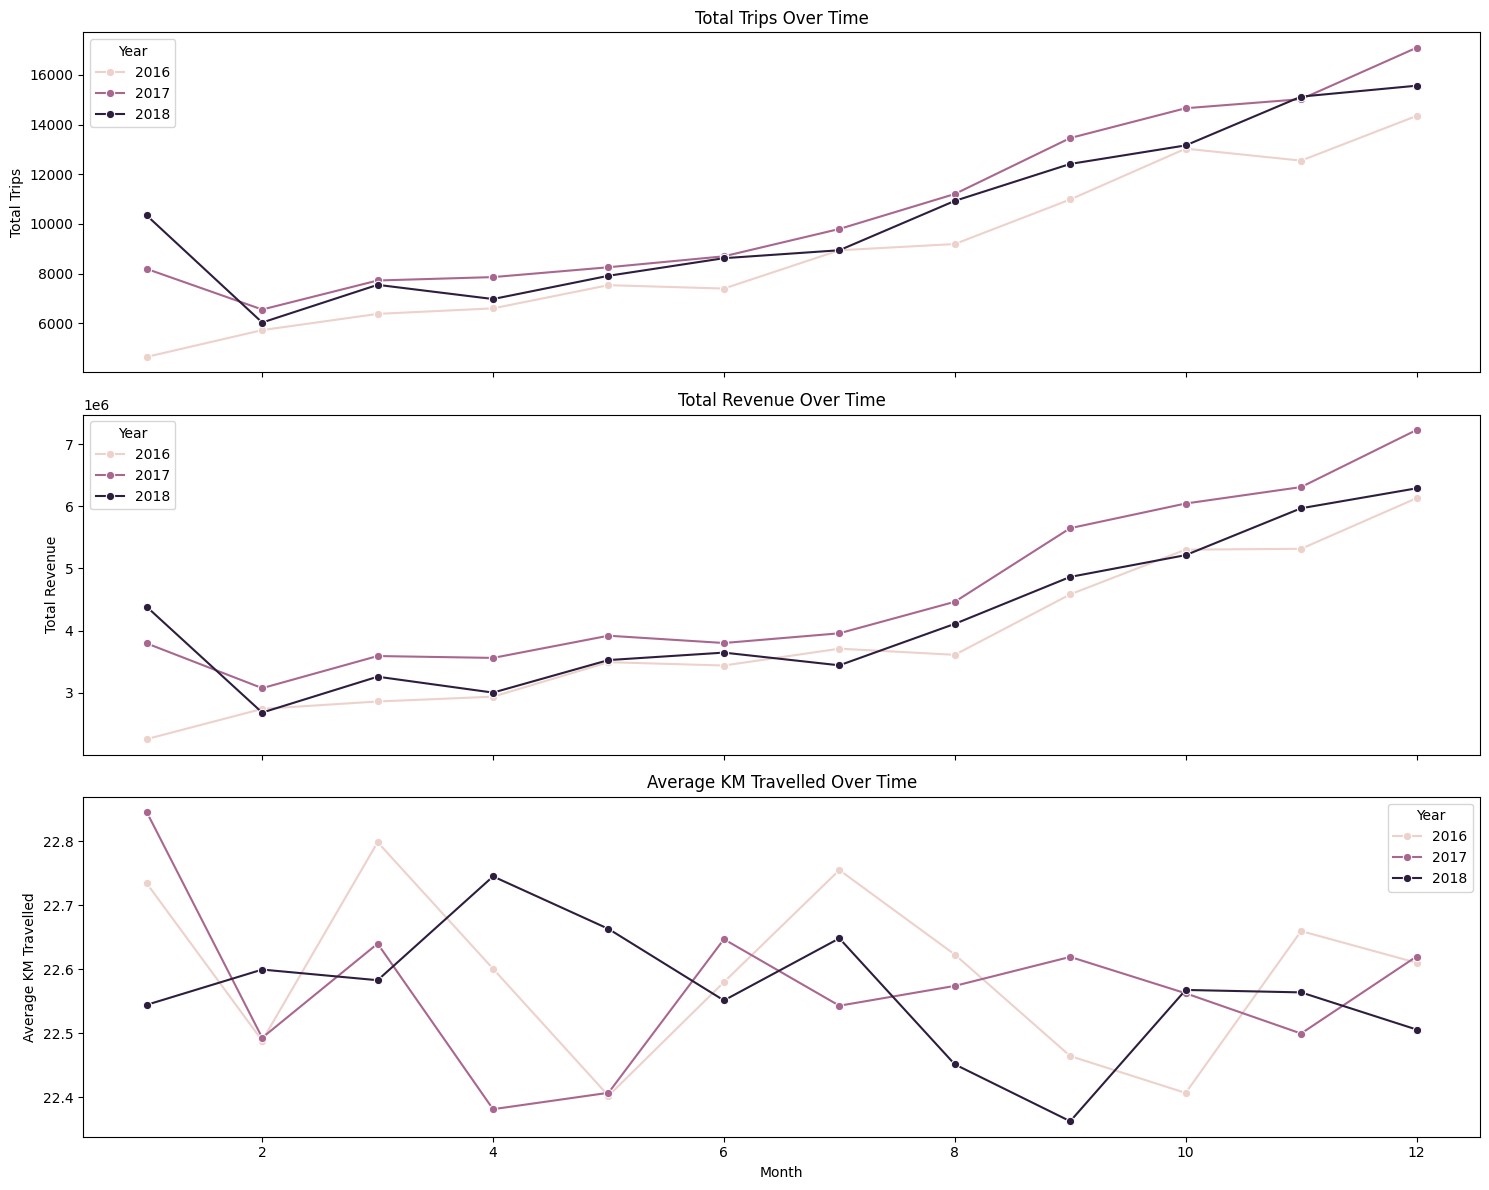

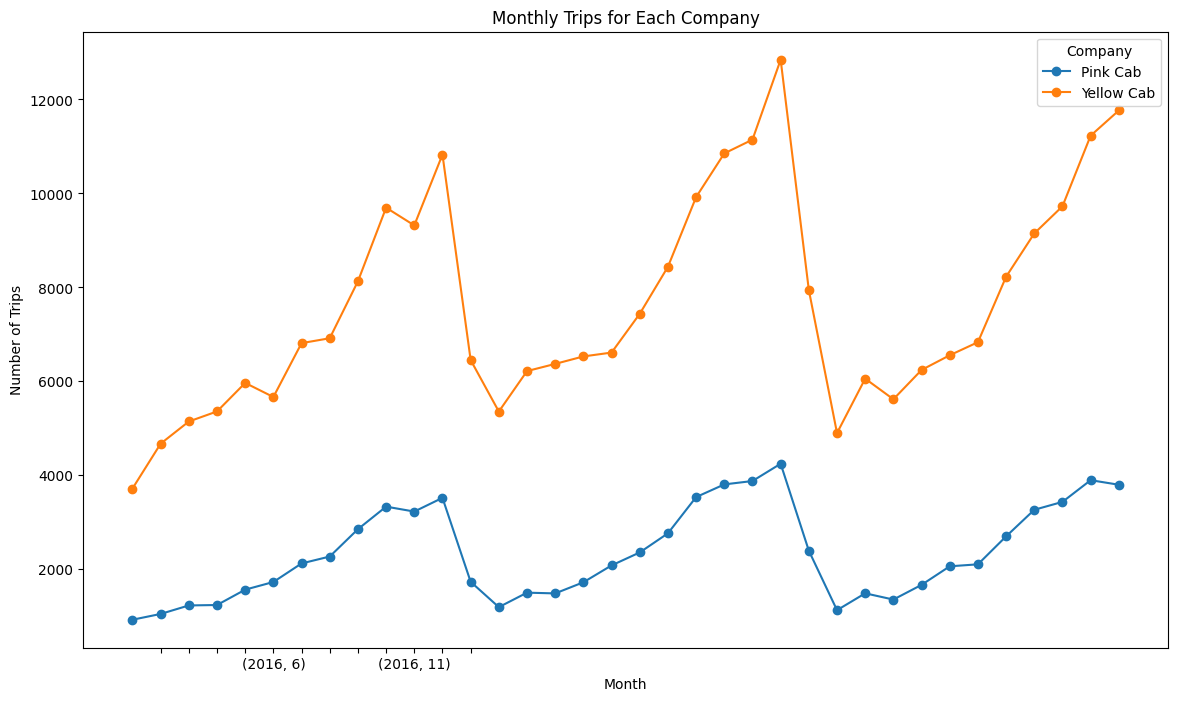

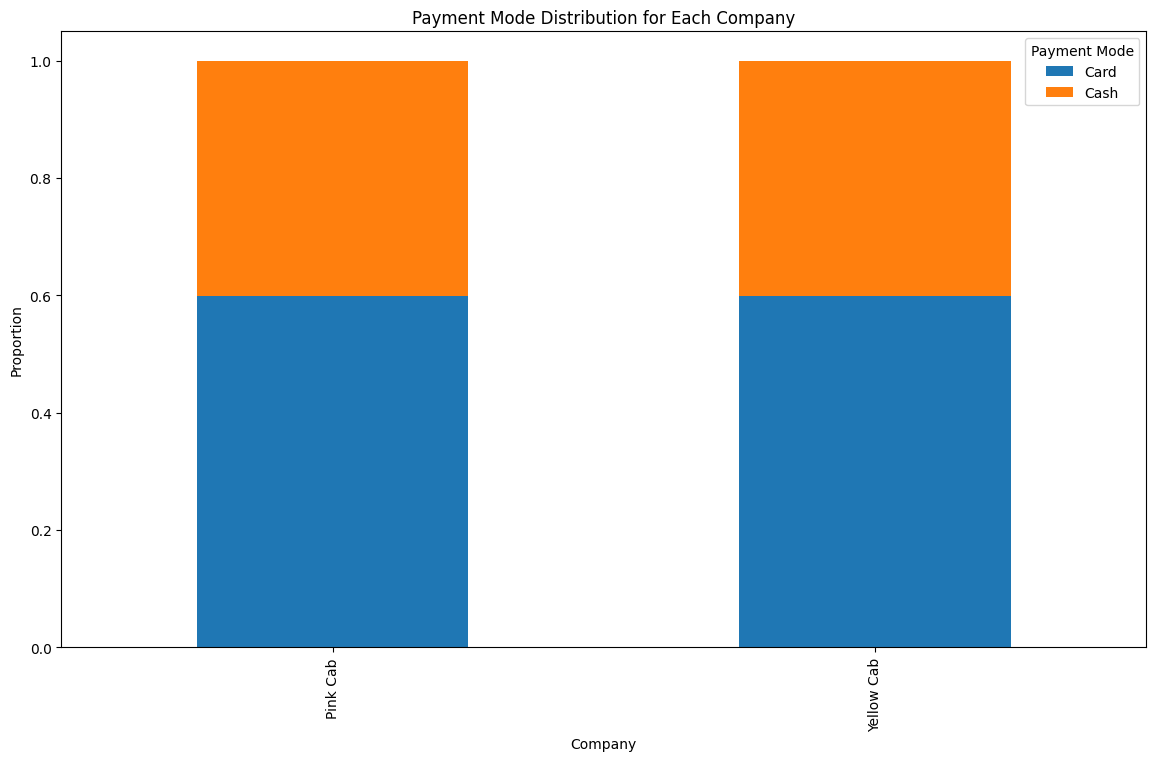

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


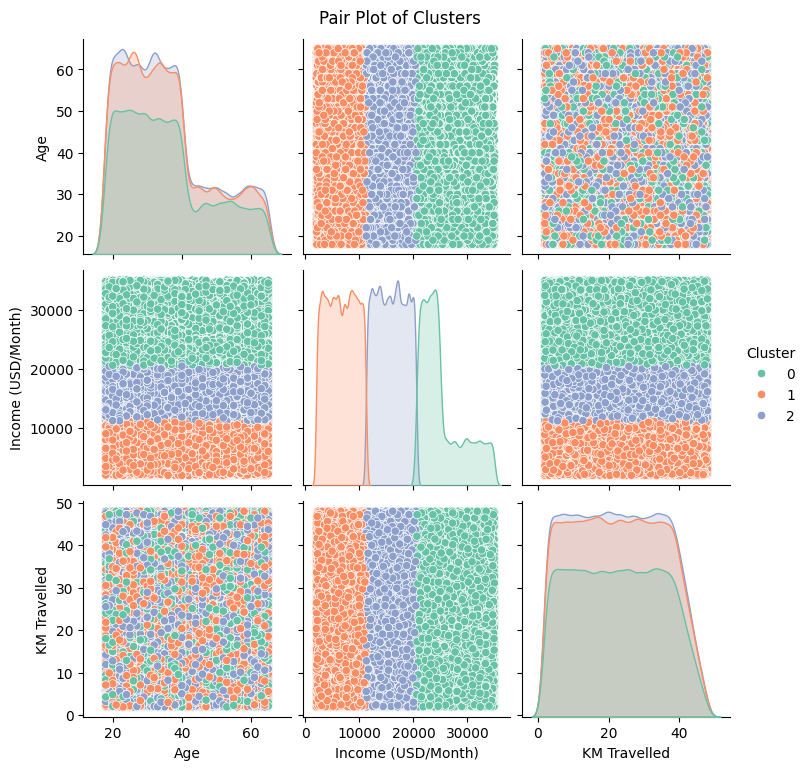

In [32]:
# The Client

# XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years
# and multiple key players in the market, it is planning for an investment in Cab industry
# and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# Project delivery:

# You have been provided with multiple data sets that contains information on 2 cab companies.
# Each file (data set) provided represents different aspects of the customer profile.
# XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

# Data Set:
# You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

# Below are the list of datasets which are provided for the analysis:
# Cab_Data.csv – this file includes details of transaction for 2 cab companies
# Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details
# Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode
# City.csv – this file contains list of US cities, their population and number of cab users

# You should fully investigate and understand each data set.

# Review the Source Documentation
# Understand the field names and data types
# Identify relationships across the files
# Field/feature transformations
# Determine which files should be joined versus which ones should be appended
# Create master data and explain the relationship
# Identify and remove duplicates
# Perform other analysis like NA value and outlier detection


# Areas to investigate:
# Which company has maximum cab users at a particular time period?
# Does margin proportionally increase with increase in number of customers?
# What are the attributes of these customer segments?
# Although not required, we encourage you to document the process and findings

# What is the business problem?
# What are the properties of the data provided (data intake report)
# What steps did you take in order to create an applicable data set?
# How did you prepare and perform your analysis?
# What type of analysis did you perform?
# Why did you choose to use certain analytical techniques over others?
# What were the results?

import pandas as pd

# Load the datasets
cab_data = pd.read_csv('/content/drive/MyDrive/Data Glacier/Week 2/Cab_Data.csv')
customer_data = pd.read_csv('/content/drive/MyDrive/Data Glacier/Week 2/Customer_ID.csv')
transaction_data = pd.read_csv('/content/drive/MyDrive/Data Glacier/Week 2/Transaction_ID.csv')
city_data = pd.read_csv('/content/drive/MyDrive/Data Glacier/Week 2/City.csv')

# Display initial information about each dataset
cab_data_info = cab_data.info()
customer_data_info = customer_data.info()
transaction_data_info = transaction_data.info()
city_data_info = city_data.info()

# Display first few rows of each dataset
cab_data_head = cab_data.head()
customer_data_head = customer_data.head()
transaction_data_head = transaction_data.head()
city_data_head = city_data.head()

cab_data_info, customer_data_info, transaction_data_info, city_data_info, cab_data_head, customer_data_head, transaction_data_head, city_data_head

# Merge the datasets
# Merge Cab_Data with Transaction_ID on 'Transaction ID'
cab_transaction_data = pd.merge(cab_data, transaction_data, on='Transaction ID', how='left')

# Merge the above result with Customer_ID on 'Customer ID'
cab_transaction_customer_data = pd.merge(cab_transaction_data, customer_data, on='Customer ID', how='left')

# Merge the result with City data on 'City'
master_data = pd.merge(cab_transaction_customer_data, city_data, on='City', how='left')

# Check the resulting merged data
master_data_info = master_data.info()
master_data_head = master_data.head()

master_data_info, master_data_head

# Convert 'Date of Travel' to datetime format
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'], origin='1899-12-30', unit='D')

# Convert 'Population' and 'Users' columns to numeric
master_data['Population'] = master_data['Population'].str.replace(',', '').astype(int)
master_data['Users'] = master_data['Users'].str.replace(',', '').astype(int)

# Check for missing values
missing_values = master_data.isnull().sum()

# Check for duplicates
duplicates = master_data.duplicated().sum()

# Display summary of missing values and duplicates
missing_values, duplicates

import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for key variables
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

sns.histplot(master_data['KM Travelled'], bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of KM Travelled')

sns.histplot(master_data['Price Charged'], bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Price Charged')

sns.histplot(master_data['Cost of Trip'], bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Cost of Trip')

sns.histplot(master_data['Age'], bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Customer Age')

sns.histplot(master_data['Income (USD/Month)'], bins=30, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Customer Income')

plt.tight_layout()
plt.show()

# Select only numeric columns for correlation matrix
numeric_columns = master_data.select_dtypes(include='number')

# Correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Convert 'Date of Travel' to datetime format if not already done
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'])

# Create time series features
master_data['Year'] = master_data['Date of Travel'].dt.year
master_data['Month'] = master_data['Date of Travel'].dt.month

# Group by year and month
monthly_data = master_data.groupby(['Year', 'Month']).agg({
    'Transaction ID': 'count',
    'Price Charged': 'sum',
    'KM Travelled': 'mean'
}).rename(columns={
    'Transaction ID': 'Total Trips',
    'Price Charged': 'Total Revenue',
    'KM Travelled': 'Average KM Travelled'
}).reset_index()

# Plotting trends over time
fig, axes = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

sns.lineplot(data=monthly_data, x='Month', y='Total Trips', hue='Year', marker='o', ax=axes[0])
axes[0].set_title('Total Trips Over Time')

sns.lineplot(data=monthly_data, x='Month', y='Total Revenue', hue='Year', marker='o', ax=axes[1])
axes[1].set_title('Total Revenue Over Time')

sns.lineplot(data=monthly_data, x='Month', y='Average KM Travelled', hue='Year', marker='o', ax=axes[2])
axes[2].set_title('Average KM Travelled Over Time')

plt.tight_layout()
plt.show()

# Seasonality in cab usage
monthly_trips = master_data.groupby(['Year', 'Month', 'Company'])['Transaction ID'].count().unstack().fillna(0)

monthly_trips.plot(kind='line', figsize=(14, 8), marker='o')
plt.title('Monthly Trips for Each Company')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.xticks(range(1, 13))
plt.legend(title='Company')
plt.show()

# Compare customer demographics between companies
demographics = master_data.groupby('Company').agg({
    'Age': 'mean',
    'Income (USD/Month)': 'mean',
    'Gender': lambda x: x.value_counts().idxmax()
})

demographics

# Correlation between revenue, cost, and trips
revenue_cost_corr = master_data[['Price Charged', 'Cost of Trip', 'KM Travelled']].corr()

revenue_cost_corr

# Distribution of payment modes for each company
payment_modes = master_data.groupby('Company')['Payment_Mode'].value_counts(normalize=True).unstack().fillna(0)

payment_modes.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Payment Mode Distribution for Each Company')
plt.xlabel('Company')
plt.ylabel('Proportion')
plt.legend(title='Payment Mode')
plt.show()

# Performance in different cities
city_performance = master_data.groupby(['City', 'Company']).agg({
    'Transaction ID': 'count',
    'Price Charged': 'sum'
}).unstack().fillna(0)

city_performance.columns = ['Pink Cab Trips', 'Yellow Cab Trips', 'Pink Cab Revenue', 'Yellow Cab Revenue']

city_performance

from sklearn.cluster import KMeans

# Select features for clustering
features = master_data[['Age', 'Income (USD/Month)', 'KM Travelled']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
master_data['Cluster'] = kmeans.fit_predict(features)

# Analyze cluster characteristics
cluster_analysis = master_data.groupby('Cluster').agg({
    'Age': 'mean',
    'Income (USD/Month)': 'mean',
    'KM Travelled': 'mean',
    'Price Charged': 'mean',
    'Cost of Trip': 'mean'
})

cluster_analysis

# Calculate profitability
master_data['Profitability'] = master_data['Price Charged'] - master_data['Cost of Trip']

# Analyze profitability distribution
profitability_analysis = master_data.groupby('City').agg({
    'Profitability': 'mean',
    'Transaction ID': 'count'
}).sort_values(by='Profitability', ascending=False)

profitability_analysis

# Identify customers who have not used the service for more than a year
latest_date = master_data['Date of Travel'].max()
churn_customers = master_data[master_data['Date of Travel'] < (latest_date - pd.DateOffset(years=1))]['Customer ID'].unique()

# Analyze churn patterns
churn_analysis = master_data[master_data['Customer ID'].isin(churn_customers)].groupby('Customer ID').agg({
    'Transaction ID': 'count',
    'Price Charged': 'sum',
    'Cost of Trip': 'sum',
    'Date of Travel': 'max'
})

churn_analysis

# Calculate CLV
master_data['CLV'] = master_data['Price Charged'] * master_data['KM Travelled']

# Analyze CLV by customer segment
clv_analysis = master_data.groupby('Cluster').agg({
    'CLV': 'mean',
    'Transaction ID': 'count'
})

clv_analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Select the features and add the cluster labels
plot_data = master_data[['Age', 'Income (USD/Month)', 'KM Travelled', 'Cluster']]

# Plot pair plot
sns.pairplot(plot_data, hue='Cluster', palette='Set2')
plt.suptitle('Pair Plot of Clusters', y=1.02)
plt.show()


